# Objective
This notebook demonstrates the SpotImage tool, which generates synthetic spot images.

# The SpotImage class
The SpotImage class implements the SpotImage tool.

### Class variables
 - spot_shapes - a list of strings representing spot shapes handled by the class
 - snr_distrs - a list of strings representing SNR distributions handled by the class

### Methods
 - init
     - Description:
          - Constructor. Check parameters. Calculate and make assignments to class attributes.
     - Inputs:
          - string background image filename (bg_img_filename)
          - string color map (cmap)
          - size of the generated image (img_sz)
          - spot parameters (patch_sz, num_spots, spot_shape_params)
          - SNR distribution parameters (snr_distr_params)
          - minimum SNR reasonably detectable (snr_threshold)
          - intensity threshold (minimum intensity value of pixel on background image at valid spot locations)
     - Returns: none
 - generate_spot_image
     - Description: 
          - Generate a spot image. The spot_array and spot_img are saved as attributes of the SpotImage object for later access.
          - The spot files are saved as png images. The coordinate system for the spots has its origin at the upper left and goes x down, y right.
     - Inputs:
          - bool whether to plot the spot array
          - bool whether to plot the image array
          - bool whether to save the spot array
          - string filename for the saved spot array
          - bool whether to save the image array
          - string filename for the saved image array
     - Returns: none
 - get_spot_array_csv, get spot_img_csv, get_coord_list_csv, get_snr_list_csv
     - Description: 
          - Save csv files of spot image data for later reference as ground truth values.
     - Input:
          - string filename for the saved csv file
     - Returns: none
 - img_to_array
     - Description: 
          - Load an image into an array of gray values scaled down to img_sz x img_sz.
     - Input:
          - string filename of image
     - Returns: 
          - array of gray values, scaled down to img_sz x img_sz
 - get_valid_coords     
     - Description:
          - Get the set of coordinates where spots may be added.
          - Coordinates below self.threshold are excluded from this set.
     - Input:
          - none
     - Returns:
          - set of valid coordinates
 - get_spot_list
     - Description:
          - Generate a list of random spots. 
          - Each spot has a random location and a patch of intensity values.
     - Input:
          - none
     - Returns:
          - list of random spots
 - get_spot_coord
     - Description: Select a random spot coordinate from the list of valid spots.
     - Input:
          - none
     - Returns:
          - a random selection from self.valid_coords
 - get_patch
	 - Description:
          - Generate one 2D square array with one spot.
		  - The spot obeys spot_shape_params.
		  - The spot has an SNR sampled from the SNR distribution.
     - Inputs:
          - x coord on total array of the center pixel of the patch
          - y coord on total array of the center pixel of the patch
          - SNR of the patch
     - Returns:
          - 2D square array with one spot
 - get_snr
     - Description:
          - Sample an SNR from the specified SNR distribution.
     - Inputs:
          - none
     - Returns:
          - SNR value
 - get_noise
     - Description:
          - Get a noise (sigma) value from a square patch on the background of size patch_sz and centered on (x,y).
     - Inputs:
          - x coord as in description
          - y coord as in description
     - Returns:
          - noise (sigma) value
     - Notes:
          - Uses skimage's estimate_sigma, which assumes the noise from the background patch follows a Gaussian distribution.
 - generate_spot_array
     - Description: 
          - Generates spot_array from spot_list.
     - Inputs:
          - none
     - Returns:
          - 2D square array with all spots
 - add_spot
     - Description:
          - Adds one spot to spot_array
     - Inputs:
          - none
     - Returns:
          - spot_array
    

In [1]:
from SpotImage import SpotImage

## Parameterize the SpotImage.
I used crops of the image with representative smFISH signals (MAX_C2-ISP_FixTest_PFA_L-probe_40x_1-3NA_1-6x_20180608_1_MMStack_Pos0.ome.tif) to get an idea of how the signals look. This Google doc describes the reference crops and their locations on the image:
https://drive.google.com/open?id=1-AG0QZVN1gHVfgpr-ogF8JvmHW3nqdOf

In [46]:
# General parameters
cmap = 'gray'
img_sz = 300
patch_sz = 11

# Spot parameters
num_spots = 200
spot_sigma = 1.75
spot_shape_params = ['2D_Gauss', spot_sigma]

# SNR Distribution Parameters
snr_mu = 10
snr_sigma = 20
snr_distr_params = ['Gauss', snr_mu, snr_sigma]

# Add to the threshold found by Otsu's so that spots appear in brighter parts of cells/tissue.
# Increasing this value decreases the area where spots can be located.
intensity_threshold = 2

# Parameters for visualizing and saving the SpotImage
plot_spots = False
plot_img = True
save_spots = False
save_img = False
spots_filename = None
spot_img_filename = None

## Instantiate and generate SpotImages
Three of the six background images used in this notebook are cropped from the cell culture image (MAX_C3-ISP_FixationTest_293T_PFA_20180601_1_MMStack_Pos0.ome.tif) and three are from the tissue image (MAX_ISP_smFISH_msLung_60x_1-47_20180319_1_pos0.tif). 

I aimed to select FOVs that represent a variety of features. This Google doc describes the location of each crop:
https://drive.google.com/file/d/1A2m7QxnMq1SQaeiZ-zSBgBE9YFNYD2XG/view?usp=sharing

### Using cell culture background images

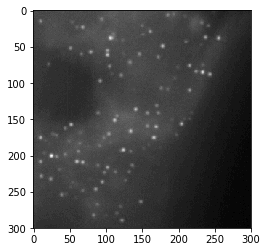

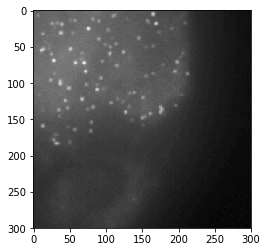

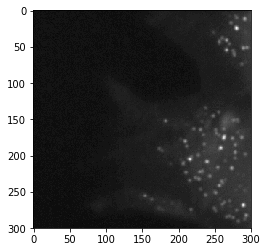

In [47]:
for i in range(1,4):
    bg_img_filename = 'MAX_C3-ISP_300_' + str(i) + '.tif'
    si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
    si.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

### Using tissue background images

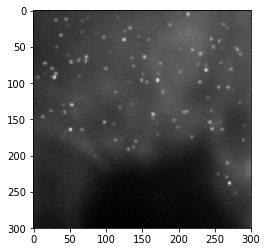

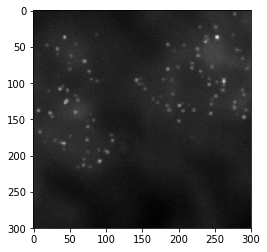

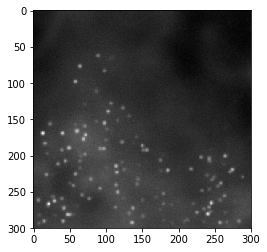

In [48]:
for i in range(1,4):
    bg_img_filename = 'MAX_ISP_300_' + str(i) + '.tif'
    si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
    si.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

## Toggle the number of spots

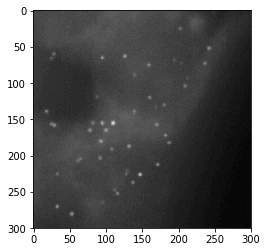

In [32]:
bg_img_filename = 'MAX_C3-ISP_300_1.tif'

num_spots = 50
si_50spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_50spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

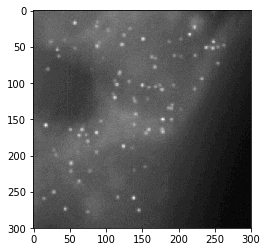

In [33]:
num_spots = 100
si_100spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_100spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

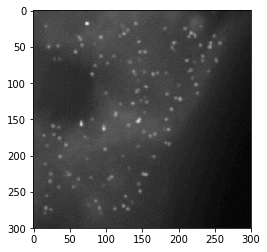

In [34]:
num_spots = 150
si_150spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_150spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

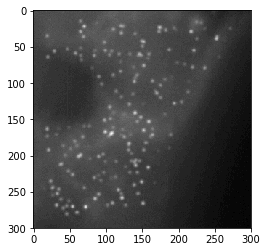

In [35]:
num_spots = 200
si_200spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_200spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

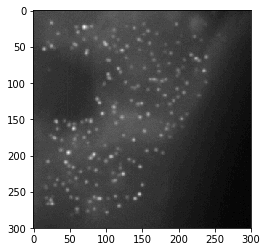

In [36]:
num_spots = 250
si_250spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_250spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

## Toggle SNR distribution mean
I am keeping the spread of the SNR distribution for now at 10 units, which seems to be a good value for realistic-looking images.

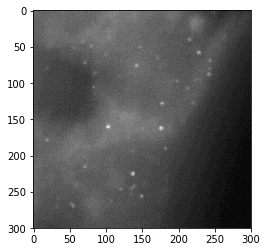

In [37]:
num_spots = 100

snr_mu = 5
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_5 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_5.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

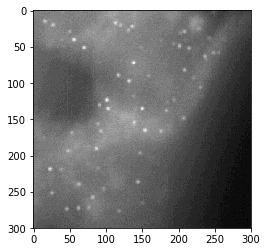

In [38]:
snr_mu = 10
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_10 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_10.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

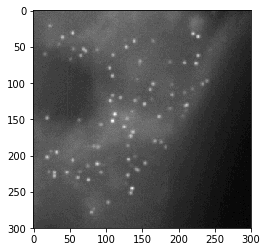

In [39]:
snr_mu = 20
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_20 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_20.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

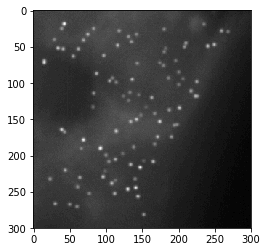

In [40]:
snr_mu = 40
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_40 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_40.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

## Toggle the patch size
Toggling the patch size does not noticably affect the image's realism.

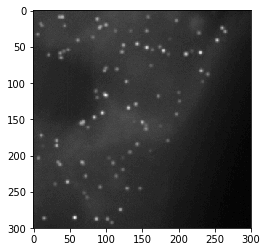

In [41]:
snr_mu = 20

patch_sz = 11
si_snr_patch = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_patch.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

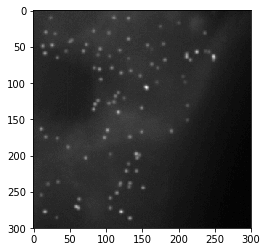

In [42]:
patch_sz = 21
si_snr_patch = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_patch.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

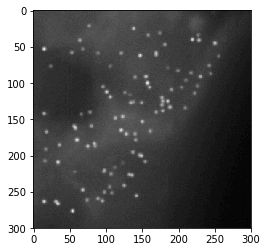

In [43]:
patch_sz = 31
si_snr_patch = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_patch.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)